In [1]:
#!pip install geopandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import geopandas as gpd
warnings.filterwarnings("ignore")

In [3]:
# Adding Vector data

In [4]:
municipality = gpd.read_file("municipality.shp")

In [5]:
municipality_geojson = gpd.read_file("municipality.geojson")

In [6]:
# Reading Metadata

In [7]:
len(municipality)

775

In [8]:
municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [9]:
municipality.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
770    Polygon
771    Polygon
772    Polygon
773    Polygon
774    Polygon
Length: 775, dtype: object

In [10]:
# shape
municipality.shape

(775, 6)

In [11]:
# CRS
municipality.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# Type
type(municipality)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

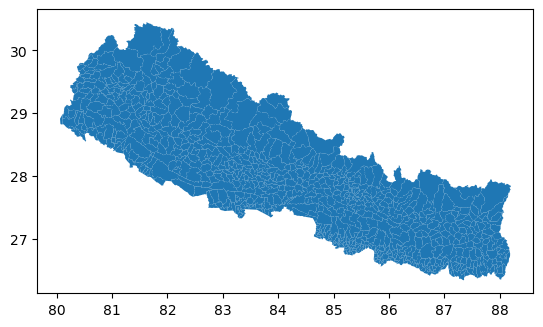

In [13]:
# Visualization of data 
municipality.plot()

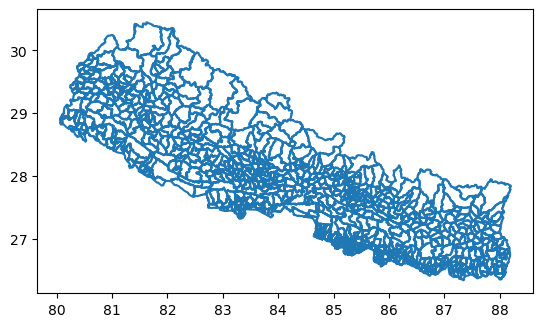

In [14]:
municipality.boundary.plot()
plt.show()

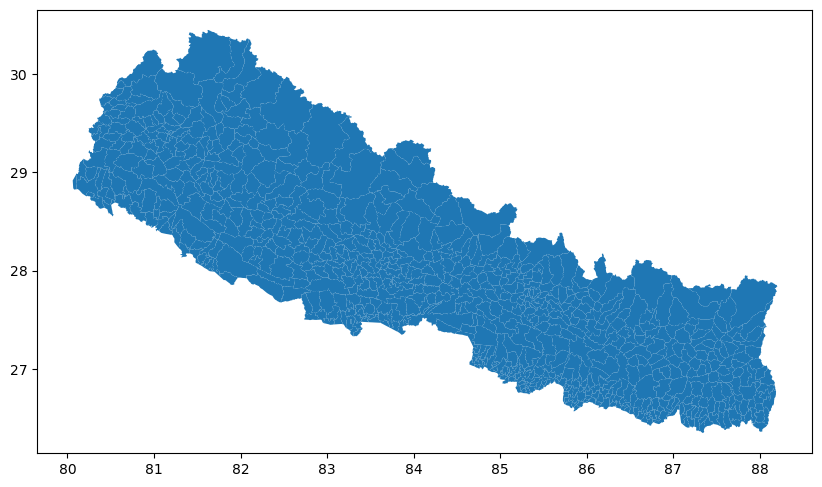

In [15]:
municipality.plot(figsize=(10,10))
plt.show()

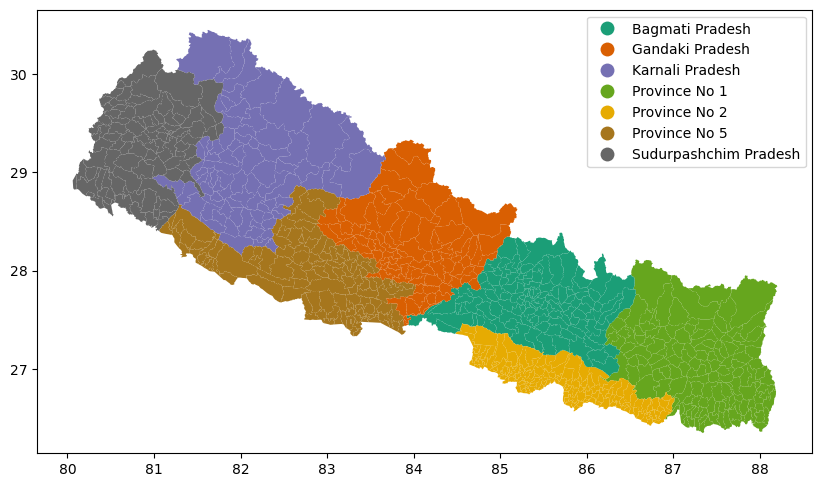

In [16]:
# Color the data with Cmap
municipality.plot("PR_NAME",cmap="Dark2",legend=True,figsize=(10,10))
plt.show()

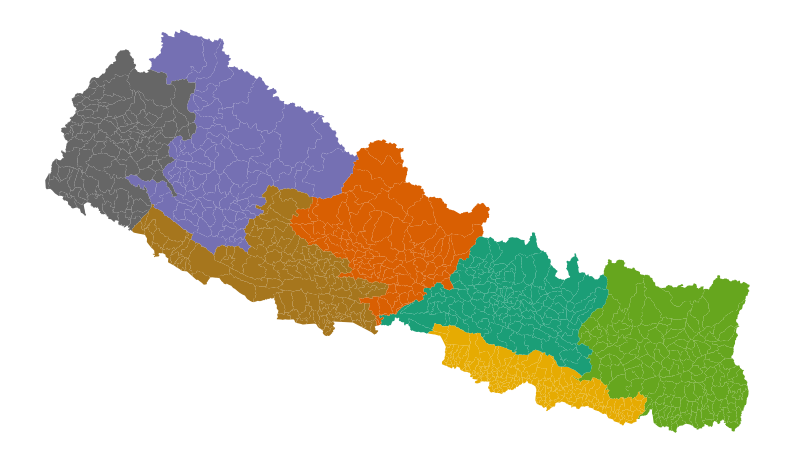

In [17]:
# Removing axis
axis=municipality.plot("PR_NAME",cmap="Dark2",figsize=(10,10))
axis.set_axis_off()
plt.show()

In [18]:
# Writing Data

In [19]:
abc = gpd.read_file("municipality.shp")

In [20]:
abc.to_file("C:/Users/HP/GIS/Geospatial Analysis with python/output/municipality.shp")

In [21]:
abc.to_file("C:/Users/HP/GIS/Geospatial Analysis with python/output/municipality.geojson",driver="GeoJSON",encoding="utf-8")

In [22]:
abc.to_file("C:/Users/HP/GIS/Geospatial Analysis with python/output/municipality.gpkg",driver="GPKG", layer="palika",encoding="utf-8")

In [23]:
# Working with Attribute data

In [24]:
rupandehi = municipality[municipality["DISTRICT"]=="RUPANDEHI"]

<AxesSubplot:>

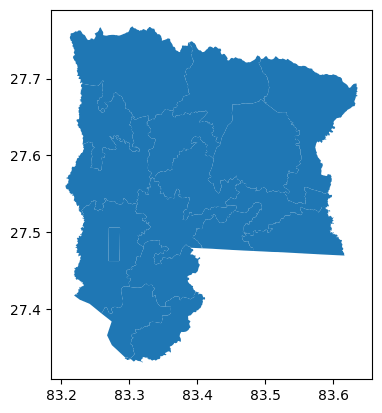

In [25]:
rupandehi.plot()

In [26]:
rupandehi.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
509,5,Province No 5,RUPANDEHI,Butwal,Upamahanagarpalika,"POLYGON ((83.39404 27.74746, 83.39444 27.74707..."
510,5,Province No 5,RUPANDEHI,Devdaha,Nagarpalika,"POLYGON ((83.50562 27.72572, 83.50622 27.72560..."
511,5,Province No 5,RUPANDEHI,Gaidahawa,Gaunpalika,"POLYGON ((83.32845 27.65126, 83.32876 27.65095..."
512,5,Province No 5,RUPANDEHI,Kanchan,Gaunpalika,"POLYGON ((83.26076 27.69161, 83.26059 27.68940..."
513,5,Province No 5,RUPANDEHI,Kotahimai,Gaunpalika,"POLYGON ((83.33693 27.48945, 83.33803 27.48927..."


In [27]:
len(rupandehi)

17

In [28]:
rupandehi.shape

(17, 6)

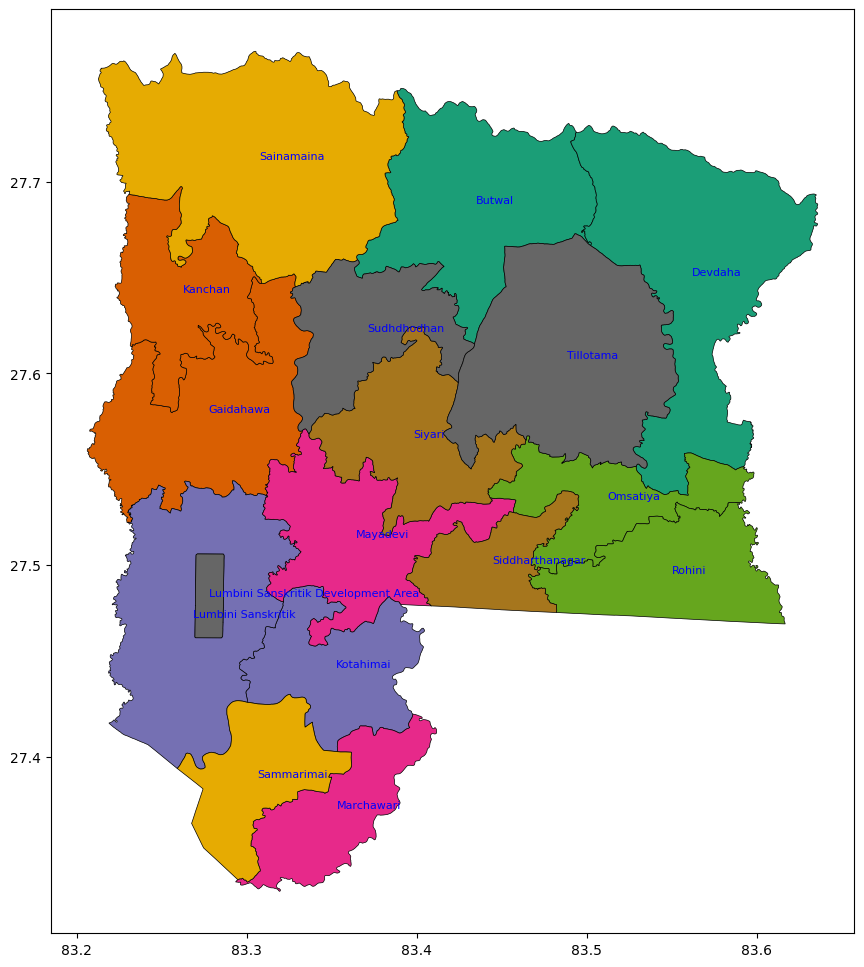

In [29]:
# Color & Label the data with Cmap 
rupandehi["center"] = rupandehi["geometry"].centroid
rupandehi_points = rupandehi.copy()
rupandehi_points.set_geometry("center", inplace = True)


ax = rupandehi.plot(figsize = (15, 12),cmap="Dark2",edgecolor = "black", linewidth = 0.5)
texts = []

for x, y, label in zip(rupandehi_points.geometry.x, rupandehi_points.geometry.y, rupandehi_points["PALIKA"]):
    texts.append(plt.text(x, y, label, fontsize = 8,color="blue"))

In [30]:
municipality_01=gpd.read_file("C:/Users/HP/GIS/Geospatial Analysis with python/output/municipality.shp")

In [31]:
municipality_01.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [32]:
municipality_01["area"]=0

In [33]:
municipality_01.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943...",0
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831...",0
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768...",0
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.66620 27.73004, 87.66659 27.73000...",0
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119...",0


In [34]:
# municipality_crs= municipality_01.to_crs(epsg=32645)
municipality_01.crs = {'init': 'epsg:32645'}

In [35]:
municipality_01["area"]=municipality_01.geometry.area/10**6

In [36]:
municipality_01.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.610 27.370, 87.611 27.369, 87.613...",8.076586e-09
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.504 27.429, 87.507 27.428, 87.508...",1.254099e-08
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.512 27.568, 87.512 27.568, 87.512...",1.915285e-08
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.666 27.730, 87.667 27.730, 87.667...",4.037392e-08
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.837 27.951, 87.837 27.951, 87.838...",1.694958e-07


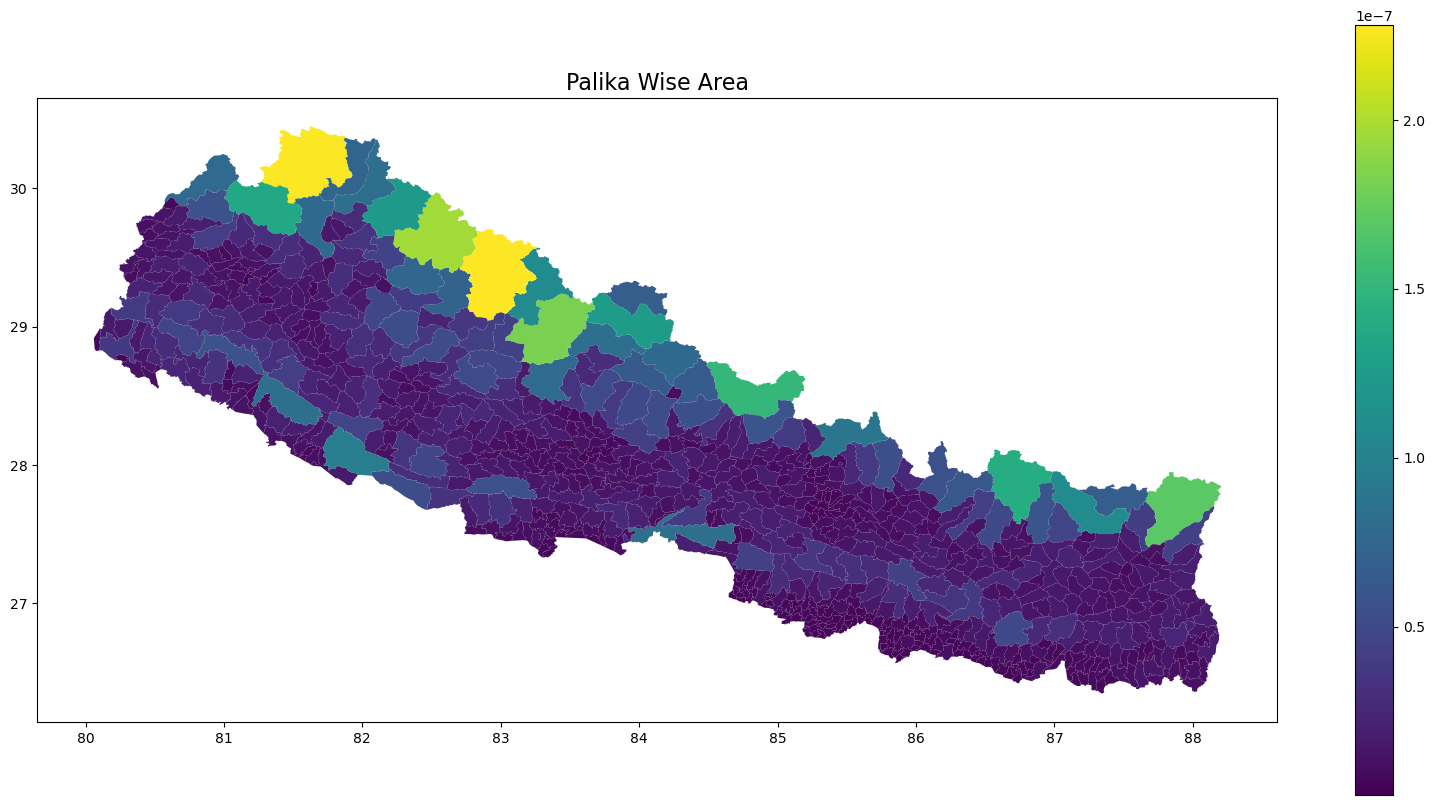

In [37]:
municipality_01.plot("area",legend=True,figsize=(20,10))
plt.title("Palika Wise Area",fontsize=16)
plt.show()

In [38]:
# Working with the Geometry
import shapely

In [39]:
from shapely.geometry import Point, LineString, Polygon

In [40]:
# Creating a geometric object
point = Point(1,1)
line = LineString([(0,0),(5,9),(10,8)])
poly=line.buffer(1)

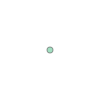

In [41]:
point

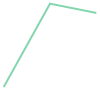

In [42]:
line

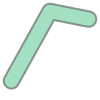

In [43]:
poly

In [44]:
point.within(poly)

True

In [45]:
point1=Point(1,7)
point1.within(poly)

False

In [46]:
poly.contains(point)

True

In [47]:
gs=gpd.GeoSeries([Point(-10,15),Point(10,12),Point(-5,16)])
gs

0    POINT (-10.00000 15.00000)
1     POINT (10.00000 12.00000)
2     POINT (-5.00000 16.00000)
dtype: geometry

<AxesSubplot:>

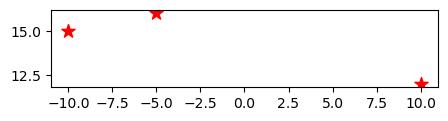

In [48]:
gs.plot(marker="*",color="red",markersize=100,figsize=(5,10))

In [49]:
!pip install folium matplotlib mapclassify

In [50]:
import mapclassify
import folium
import matplotlib

In [51]:
rupandehi.explore()

In [52]:
rupandehi.explore(column="PALIKA",cmap="Dark2")